In [1]:
# importing needed libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

# Loading and Getting a Glimpse of the Dataset

In [2]:
# loading dataset
# in this dataset, the data are separated using ';' symbol. Therefore, when reading the CSV, 
# we should instruct the Pandas DataFrame about the separater. This is because the default separater is the ',' 
# and that if we do not specify, the DataFrame will have all the row data into one cell.
data = pd.read_csv('/content/bank-additional-full.csv',sep=';')

data2=data

# getting a glimpse of the data
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# we use value_counts() to display how many instances are present in the
# categorical feature/class variable
data['y'].value_counts()


no     36548
yes     4640
Name: y, dtype: int64

By considering the counts of the class variable, we could see that the dataset is an imbalanced dataset, since the number of 'no' are almost 8 times the 'yes' class.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b76f2c7f0>,
      dtype=object)

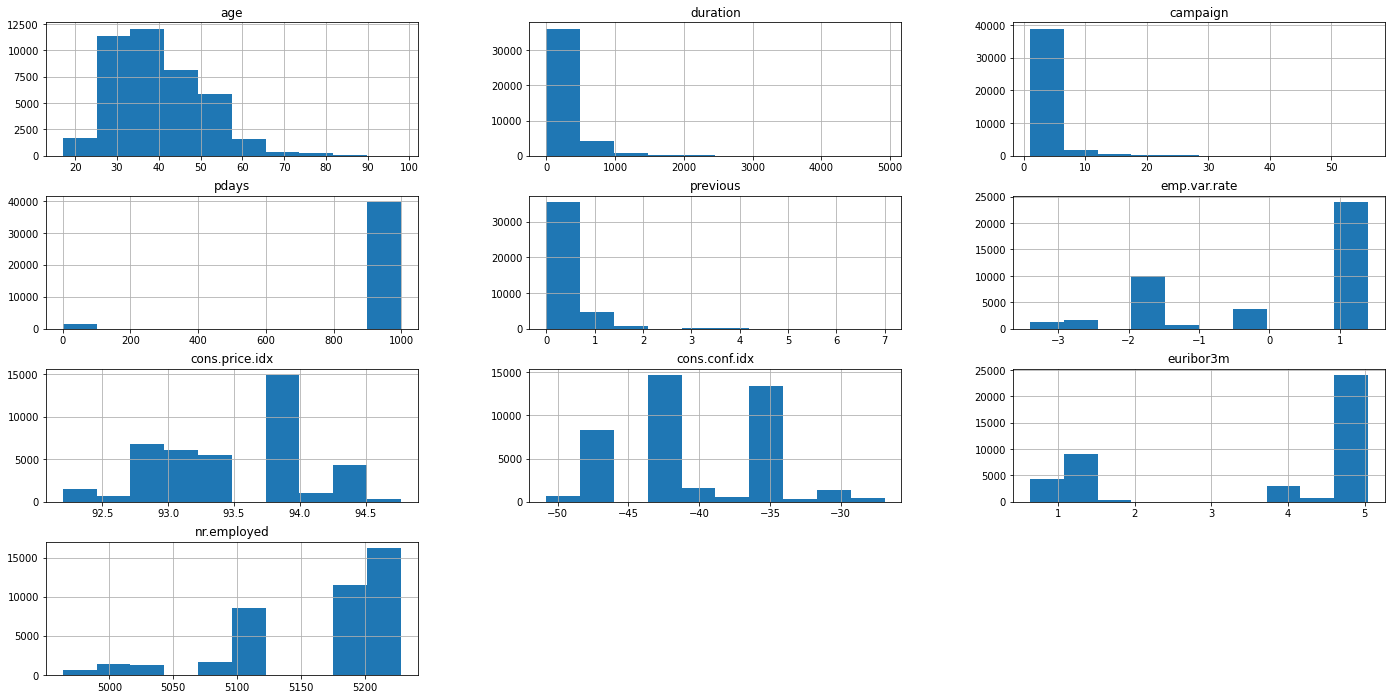

In [4]:
plt.rcParams["figure.figsize"] = (24, 12)
data.hist()

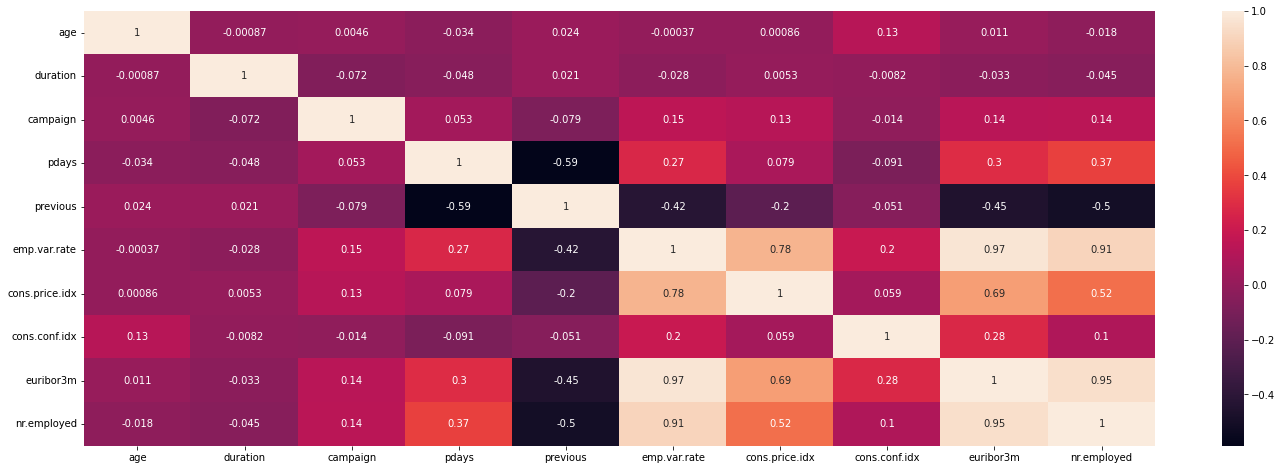

In [5]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(data.corr(),annot=True);

# Preprocessing Data

Preprocessing data includes handling missing values and outliers, applying feature coding techniques if needed, scale & standardize features.

**Checking for Missing values**




In [6]:
# isnull() method can be used to check each cell in the dataset
data.isnull()           

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Finding total standard missing values for each feature
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
# Making a list of missing value types
missing_values = ["unknown"]

# reading the data again, with the defined non-standard missing value
new_data = pd.read_csv('/content/bank-additional-full.csv',sep=';', na_values = missing_values)

print(new_data.isnull().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


According to the above output, we can see that 4 features contain values as 'unknown', which is a non-standard missing value. However, I have not removed them. *These 'unknown' missing values were treated as separate feature values in my model creation*. This is because these missing values may not be random and may themselves be information.

**Handling Outliers**

We check for outliers only in the features that contain numerical values.

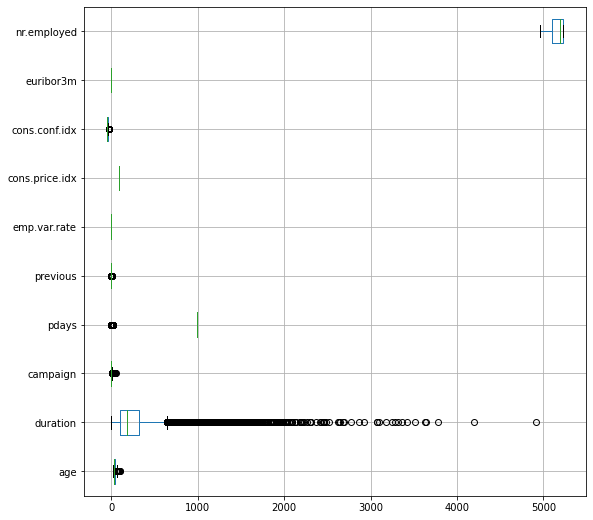

In [9]:
# Visualizing the boxplots of all features in the dataset before closer inspection
temp_df = pd.DataFrame(data, columns=['age', 'duration', 'campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])
temp_df.boxplot(vert=False, figsize=(9,9))

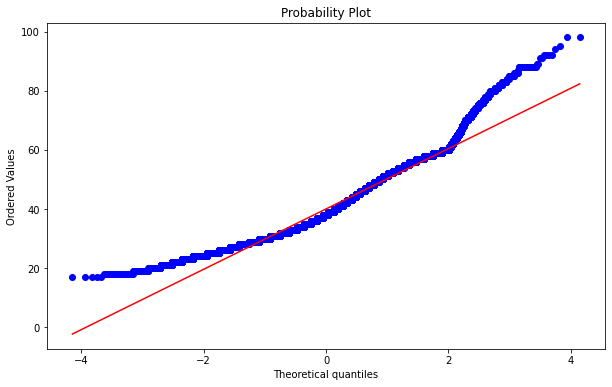

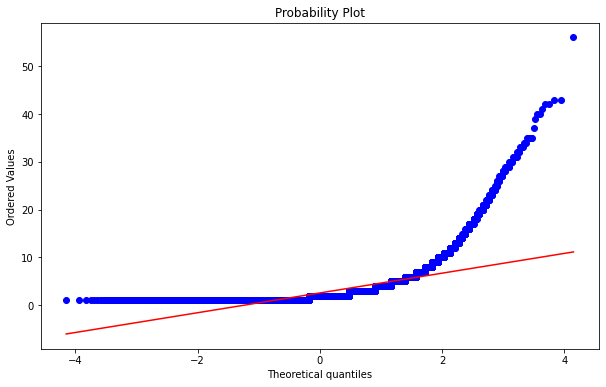

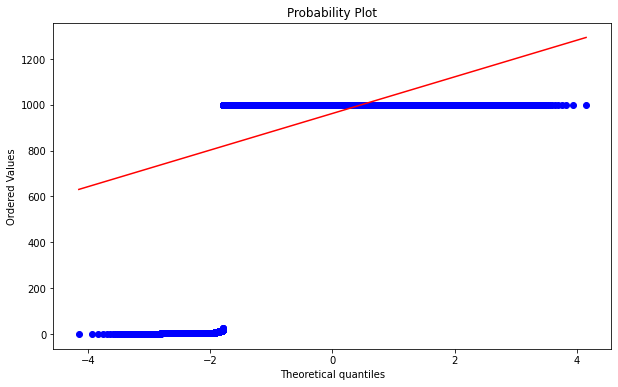

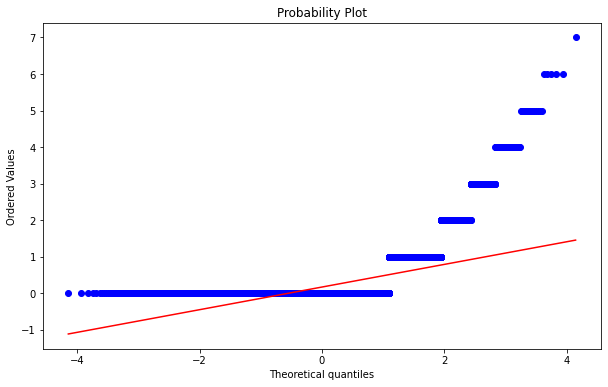

In [10]:
import scipy.stats as stats 
columns = ['age', 'campaign','pdays','previous']
for i in range (0, len(columns)):
  plt.rcParams["figure.figsize"] = (10, 6)
  stats.probplot(data[columns[i]], dist="norm", plot=plt)
  plt.show()

1. Checking the 'age' feature for outliers

Age Shape: (41188, 21)


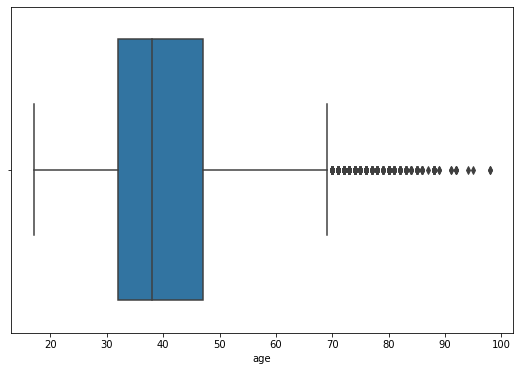

In [11]:
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Age Shape:",data.shape)
## Max and Min Quantile
max_val = data.age.quantile(0.75)
min_val = data.age.quantile(0.25)

sns.boxplot(data['age'])
plt.show()

When checking the boxplot for the **age** feature, we can see that there are no significant outliers, and that there are many datapoints that are outside the boxplot. Therefore, i will not be removing the datapoints that are identified here as outliers, since they can carry information in them.

2. Checking the **duration** feature for outliers

Duration Shape: (41188, 21)


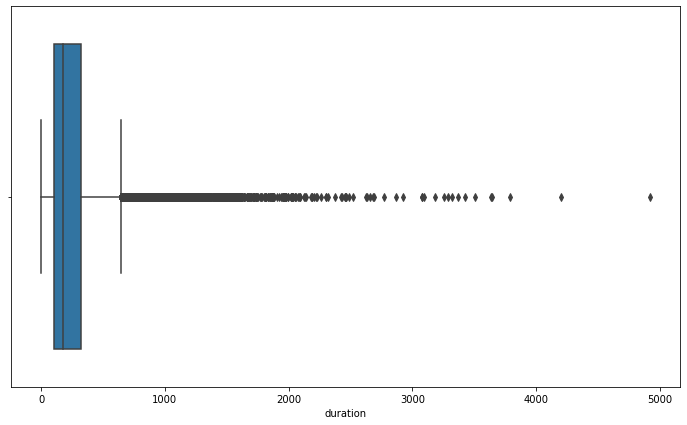

102.0


In [12]:
fig, axes = plt.subplots(figsize=(12, 7))

# Checking the box plot for duration feature
print("Duration Shape:",data.shape)
## Max and Min Quantile
max_val = data.duration.quantile(0.75)
min_val = data.duration.quantile(0.25)

sns.boxplot(data['duration'])
plt.show()
print(min_val)

When checking the above visualized boxplot for the **duration** feature, we can see that eventhough there are many data points outside the boxplot as in the age boxplot, we can point out a range where the datapoints start to spread wider. Therefore, I will manually set the cutoff region for outliers as duration > 2600, which is purely out of my discretion.

After Duration Shape: (41165, 21)


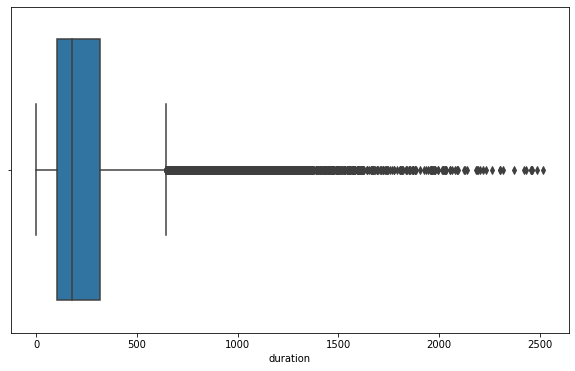

In [13]:
# removing datapoints that have duration values greater than 2600
data = data[(data['duration']<2600)]

print("After Duration Shape:",data.shape)

sns.boxplot(data['duration'])
plt.show()

3. Checking outliers for **campaign** feature

Campaign Shape: (41165, 21)


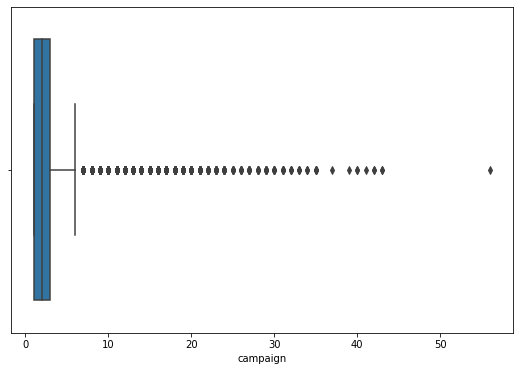

In [14]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for campaign feature
print("Campaign Shape:",data.shape)
## Max and Min Quantile
max_val = data.campaign.quantile(0.75)
min_val = data.campaign.quantile(0.25)

sns.boxplot(data['campaign'])
plt.show()

After Campaign Shape: (41150, 21)


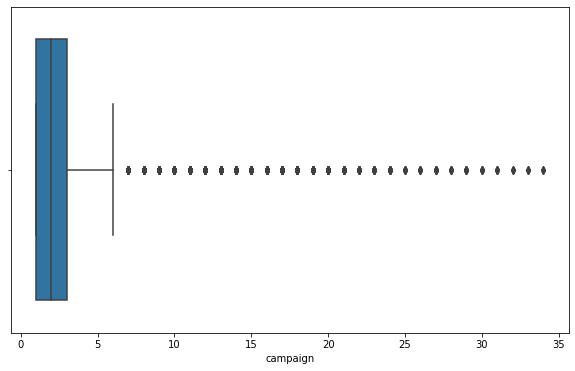

In [15]:
# Removing datapoints that have campaign values greater than 35
data = data[(data['campaign']<35)]

print("After Campaign Shape:",data.shape)

sns.boxplot(data['campaign'])
plt.show()

There are no outliers in the day feature.

4. Checking outliers for **previous** feature

previous Shape: (41150, 21)


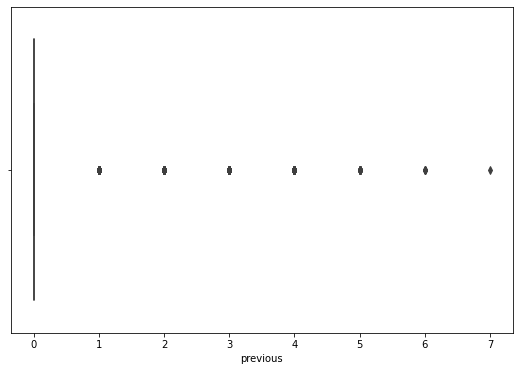

In [16]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for previous feature
print("previous Shape:",data.shape)
## Max and Min Quantile
max_val = data.previous.quantile(0.75)
min_val = data.previous.quantile(0.25)

sns.boxplot(data['previous'])
plt.show()

In [17]:
data['previous'].value_counts()

0    35526
1     4561
2      753
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

6. Checking outliers in **pdays** feature

pdays Shape: (41150, 21)


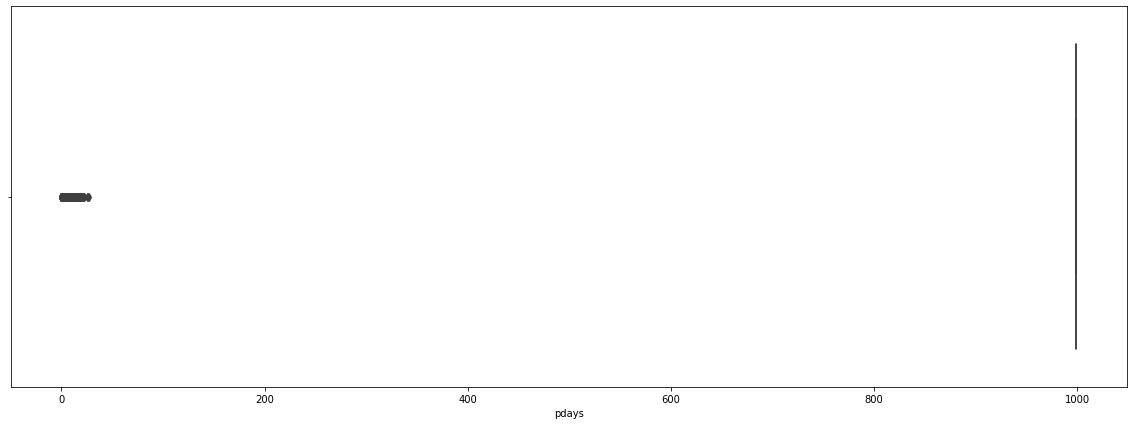

In [18]:
fig, axes = plt.subplots(figsize=(20, 7))

# Checking the box plot for pdays feature
print("pdays Shape:",data.shape)
## Max and Min Quantile
max_val = data.pdays.quantile(0.75)
min_val = data.pdays.quantile(0.25)

sns.boxplot(data['pdays'])
plt.show()

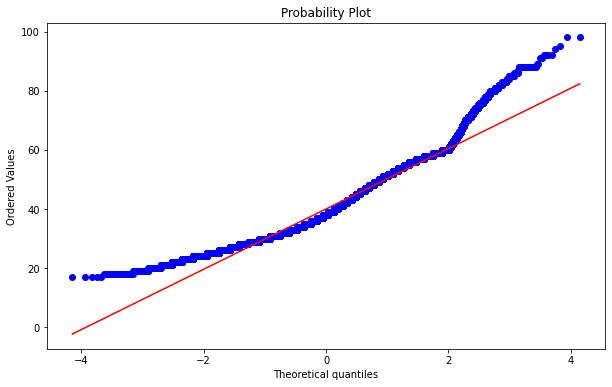

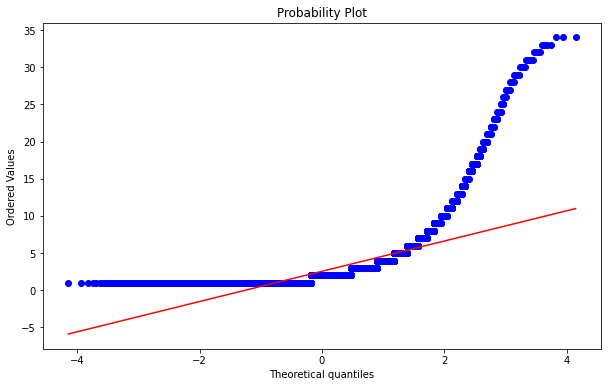

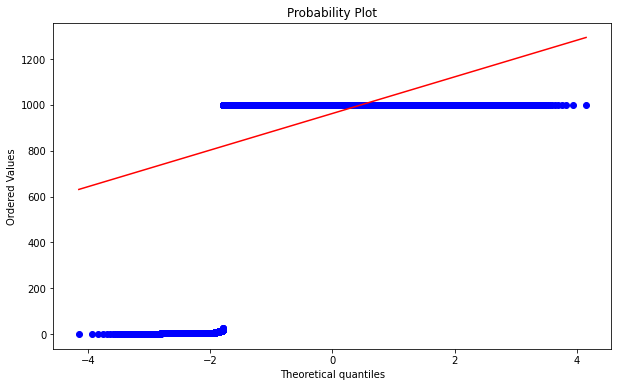

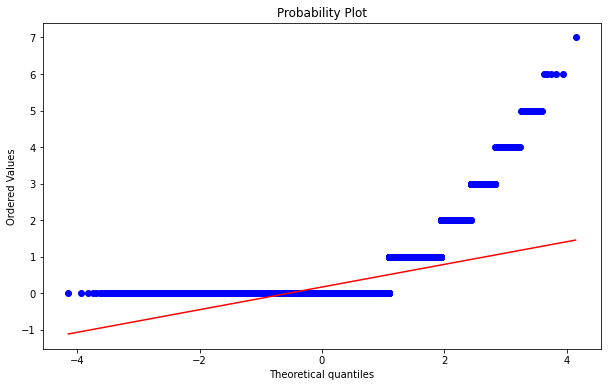

In [19]:
import scipy.stats as stats 
columns = ['age', 'campaign','pdays','previous']
for i in range (0, len(columns)):
  plt.rcParams["figure.figsize"] = (10, 6)
  stats.probplot(data[columns[i]], dist="norm", plot=plt, )
  plt.show()

In [20]:
data['pdays'].value_counts()

999    39636
3        438
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

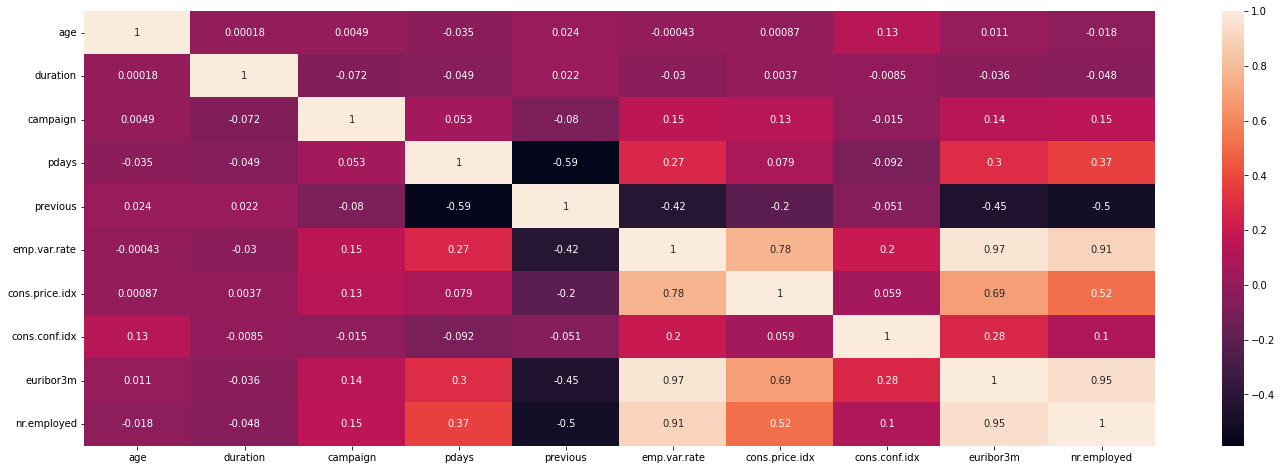

In [21]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(data.corr(),annot=True);

**Feature Enoding**

In this process, the categorical data are encoded into numerical data. The LabelEncoder is used to encode the class values to integers accordingly as follows.

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()

In [23]:
data_Encode = data.copy()
data_Encode.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

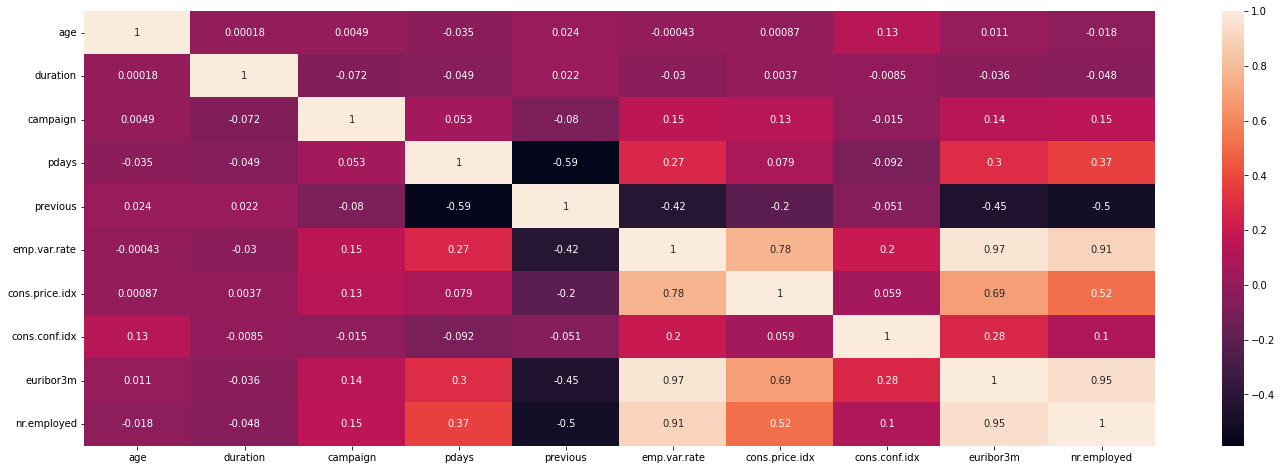

In [24]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(data_Encode.corr(),annot=True);

In [25]:
data_Encode

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [26]:
features = ['default' ,'housing', 'loan','month', 'y','contact','education','poutcome','marital','job', 'day_of_week']
feature_label_dict = {
                  'default':{'unknown':0, 'no':1,'yes':2},
                  'housing':{'unknown':0, 'no':1,'yes':2},
                  'loan':{'unknown':0, 'no':1,'yes':2},
                  'day_of_week':{'mon':1, "tue":2, "wed":3, "thu":4, "fri":5},
                  'month':{'mar':1,'apr':2,'may':3,'jun':4,'jul':5,'aug':6,'sep':7,'oct':8,'nov':9,'dec':10},
                  'y':{'no':0,'yes':1},
                  'contact':{'cellular':0, 'telephone':1},
                  'education':{'unknown':0, 'basic.4y':1, 'basic.6y':2,'basic.9y':3, 'high.school':4, 'illiterate': 5, 'professional.course':6, 'university.degree':7},
                  'poutcome':{'nonexistent':0, 'failure':1, 'success':2},
                  'marital':{'unknown':0, 'divorced':1,'single':2,'married':3},
                  'job':{'unknown':0,'unemployed':1, 'student':2,'management':3, 'technician':4, 'entrepreneur':5, 'blue-collar':6, 'retired':7, 'admin.':8, 'services':9, 'self-employed':10, 'housemaid':11}
                 }
for f in features:     
  data_Encode = data_Encode.replace({f:feature_label_dict[f]})
  
  print ("Labelled as: ",feature_label_dict[f])

Labelled as:  {'unknown': 0, 'no': 1, 'yes': 2}
Labelled as:  {'unknown': 0, 'no': 1, 'yes': 2}
Labelled as:  {'unknown': 0, 'no': 1, 'yes': 2}
Labelled as:  {'mar': 1, 'apr': 2, 'may': 3, 'jun': 4, 'jul': 5, 'aug': 6, 'sep': 7, 'oct': 8, 'nov': 9, 'dec': 10}
Labelled as:  {'no': 0, 'yes': 1}
Labelled as:  {'cellular': 0, 'telephone': 1}
Labelled as:  {'unknown': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'illiterate': 5, 'professional.course': 6, 'university.degree': 7}
Labelled as:  {'nonexistent': 0, 'failure': 1, 'success': 2}
Labelled as:  {'unknown': 0, 'divorced': 1, 'single': 2, 'married': 3}
Labelled as:  {'unknown': 0, 'unemployed': 1, 'student': 2, 'management': 3, 'technician': 4, 'entrepreneur': 5, 'blue-collar': 6, 'retired': 7, 'admin.': 8, 'services': 9, 'self-employed': 10, 'housemaid': 11}
Labelled as:  {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}


In [27]:
data_Encode.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,11,3,1,1,1,1,1,3,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,9,3,4,0,1,1,1,3,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,9,3,4,1,2,1,1,3,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,8,3,2,1,1,1,1,3,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,9,3,4,1,1,2,1,3,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


The feature **duration** contains last contact duration, in seconds.

As said by the data source, this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Therefore, I have decided to remove the feature duration from the dataset used for prediction.

In [28]:
data_Encode.drop(['duration'], inplace=True, axis = 1)

data_Encode

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,11,3,1,1,1,1,1,3,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,9,3,4,0,1,1,1,3,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,9,3,4,1,2,1,1,3,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,8,3,2,1,1,1,1,3,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,9,3,4,1,1,2,1,3,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,7,3,6,1,2,1,0,9,5,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,6,3,6,1,1,1,0,9,5,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,7,3,7,1,2,1,0,9,5,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,3,6,1,1,1,0,9,5,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


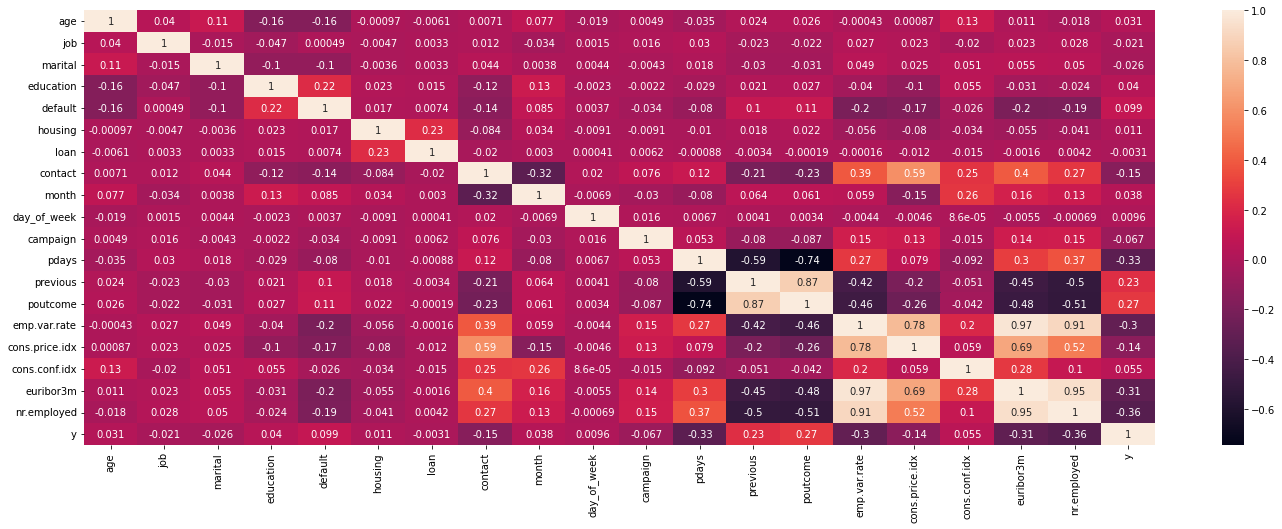

In [29]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(data_Encode.corr(),annot=True);

In [30]:
data_Encode.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000,41150.000000
mean,40.025079,6.271470,2.489259,4.410863,0.791300,1.499806,1.127704,0.364933,4.608190,2.979368,2.554168,962.465930,0.173074,0.170012,0.081237,93.575357,-40.502539,3.620531,5167.009179,0.112467
std,10.421928,2.369603,0.696864,2.225870,0.406564,0.545918,0.399273,0.481417,2.041287,1.411371,2.676035,186.934153,0.495020,0.455846,1.571201,0.578859,4.629030,1.734673,72.262677,0.315943
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,6.000000,3.000000,4.000000,1.000000,2.000000,1.000000,0.000000,4.000000,3.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,8.000000,3.000000,7.000000,1.000000,2.000000,1.000000,1.000000,6.000000,4.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,10.000000,5.000000,34.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


**Splitting the Data**

In [31]:
y = data_Encode['y']
X = data_Encode.values[:, :-1] # get all columns except the last column

# spliting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

**Feature Scaling**

After encoding categorical data, the dataset consists of features with different data ranges. These values are standardized and feature scaling is done as follows. Numerical features were scaled by removing the
mean and by scaling to unit variance (StandardScaler) as follows.

In [32]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()  
scaler.fit(X)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [33]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Feature Engineering



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.040095,0.111560,-0.162982,-0.165711,-0.001199,-0.006119,0.007530,0.079492,-0.018546,0.004857,-0.036054,0.028435,0.029723,-0.001356,0.001795,0.129564,0.009947,-0.019437
1,0.040095,1.000000,-0.015753,-0.048437,-0.000691,-0.001336,0.004202,0.006513,-0.032951,-0.002179,0.015432,0.023219,-0.019141,-0.017532,0.024910,0.018754,-0.019047,0.020980,0.027413
2,0.111560,-0.015753,1.000000,-0.104504,-0.104648,-0.007543,-0.001277,0.040078,0.010848,0.008845,-0.006934,0.019923,-0.030968,-0.031681,0.050266,0.025026,0.051345,0.056846,0.052742
3,-0.162982,-0.048437,-0.104504,1.000000,0.221038,0.019122,0.011393,-0.116012,0.123401,-0.001640,-0.000898,-0.032839,0.021843,0.026501,-0.039442,-0.097387,0.054935,-0.030934,-0.025563
4,-0.165711,-0.000691,-0.104648,0.221038,1.000000,0.018841,0.007994,-0.133465,0.080622,-0.000053,-0.033311,-0.079970,0.102583,0.108773,-0.203761,-0.169577,-0.025456,-0.195767,-0.190569
5,-0.001199,-0.001336,-0.007543,0.019122,0.018841,1.000000,0.231088,-0.079656,0.033594,-0.007329,-0.010653,-0.002398,0.012538,0.014237,-0.052970,-0.079158,-0.031869,-0.051088,-0.037233
6,-0.006119,0.004202,-0.001277,0.011393,0.007994,0.231088,1.000000,-0.018041,0.000628,0.001783,0.007949,0.004747,-0.009776,-0.005655,0.000460,-0.010085,-0.013462,-0.000183,0.004856
7,0.007530,0.006513,0.040078,-0.116012,-0.133465,-0.079656,-0.018041,1.000000,-0.321291,0.020616,0.073469,0.116968,-0.215703,-0.228899,0.392532,0.590206,0.254653,0.398311,0.268366
8,0.079492,-0.032951,0.010848,0.123401,0.080622,0.033594,0.000628,-0.321291,1.000000,-0.007371,-0.030091,-0.077724,0.059756,0.057148,0.063105,-0.147467,0.264718,0.168064,0.136991
9,-0.018546,-0.002179,0.008845,-0.001640,-0.000053,-0.007329,0.001783,0.020616,-0.007371,1.000000,0.014495,0.007197,0.002557,0.002044,-0.002612,-0.002515,0.001075,-0.003301,0.000397


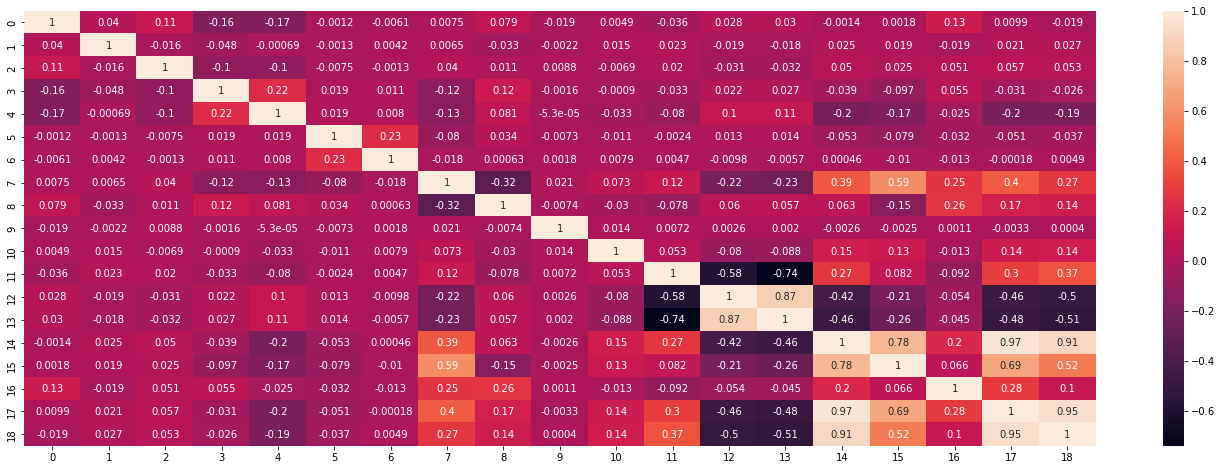

In [34]:
# draw the correlation matrix
correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(24,8))         # Sample figsize in inches
sns.heatmap(correlation_matrix, ax=ax, annot=True)
correlation_matrix

In [35]:
# getting the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

# checking which columns can be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

# removing the selected columns
X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
print(X_train.head())

    0         1         2         3         4         5         6         7   \
0  NaN  0.040095  0.111560 -0.162982 -0.165711 -0.001199 -0.006119  0.007530   
1  NaN       NaN -0.015753 -0.048437 -0.000691 -0.001336  0.004202  0.006513   
2  NaN       NaN       NaN -0.104504 -0.104648 -0.007543 -0.001277  0.040078   
3  NaN       NaN       NaN       NaN  0.221038  0.019122  0.011393 -0.116012   
4  NaN       NaN       NaN       NaN       NaN  0.018841  0.007994 -0.133465   
5  NaN       NaN       NaN       NaN       NaN       NaN  0.231088 -0.079656   
6  NaN       NaN       NaN       NaN       NaN       NaN       NaN -0.018041   
7  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11 NaN       NaN       NaN       NaN    


**Applying PCA**

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.


In [36]:
from sklearn.decomposition import PCA

# apply the PCA for feature for feature reduction
pca = PCA(n_components=0.95)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18
0,3.547843,0.307452,-2.137113,-1.532392,0.513333,-0.915543,-0.319844,-0.758048,-0.787841,-0.693921,-0.580780,0.195441,-0.349635,-0.372964,-1.197339,0.519377,0.108564,-2.190773
1,1.532837,0.729468,0.732923,-0.184587,0.513333,0.916255,-0.319844,1.319177,-0.297948,1.431698,6.519363,0.195441,-0.349635,-0.372964,0.839345,1.536908,-0.280291,0.845410
2,-0.674075,-1.380615,0.732923,1.163217,0.513333,0.916255,-0.319844,-0.758048,0.191945,-1.402461,-0.580780,0.195441,-0.349635,-0.372964,0.839345,0.591934,-0.474719,0.845410
3,1.532837,0.729468,0.732923,-1.981660,-1.946336,0.916255,-0.319844,1.319177,-0.787841,-0.693921,-0.580780,0.195441,-0.349635,-0.372964,0.648405,0.723229,0.886274,0.331999
4,1.053073,1.151485,-2.137113,-0.184587,0.513333,-0.915543,-0.319844,-0.758048,2.151517,-0.693921,-0.580780,0.195441,1.670509,1.820784,-0.115351,-0.648451,-0.323497,0.398424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32915,0.093546,-0.114565,0.732923,-1.981660,0.513333,-0.915543,2.184740,-0.758048,-0.787841,0.723158,-0.207088,0.195441,1.670509,1.820784,-1.197339,-1.178811,-1.230826,-0.939766
32916,-1.057886,0.729468,-0.702095,-0.184587,0.513333,0.916255,-0.319844,1.319177,2.151517,-1.402461,-0.580780,-5.116655,1.670509,4.014532,-0.751814,2.058630,-2.224567,-2.814892
32917,-0.865981,-0.958598,0.732923,0.713949,0.513333,0.916255,2.184740,-0.758048,0.681838,1.431698,0.540296,0.195441,-0.349635,-0.372964,0.839345,-0.226927,0.951083,0.845410
32918,0.381404,0.729468,0.732923,1.163217,0.513333,0.916255,-0.319844,-0.758048,1.661624,0.014618,0.166604,-5.116655,1.670509,4.014532,-2.215680,-1.976942,2.938565,-2.068993





# Developing the Neural Network Model

In [37]:
# Load libraries
from keras import models
from keras import layers
from keras import regularizers

In [38]:
# Start neural network
network = models.Sequential()

In [39]:
# Start neural network
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(14,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))

In [40]:
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric

In [41]:
from keras.callbacks import ModelCheckpoint
# Save the model 
checkpoint = [ModelCheckpoint(filepath="model.hdf5")]

In [42]:
# Train neural network
history = network.fit(PCA_X_train, # Features
y_train, # Target vector
epochs=5, # Number of epochs
callbacks=checkpoint, # Checkpoint   
verbose=1, # Print description after each epoch
batch_size=100, # Number of observations per batch
validation_data=(PCA_X_test, y_test)) # Test data

Epoch 1/5
330/330 [==============================] - 2s 3ms/step - loss: 0.5191 - accuracy: 0.8920 - val_loss: 0.3888 - val_accuracy: 0.8903
Epoch 2/5
330/330 [==============================] - 1s 3ms/step - loss: 0.3386 - accuracy: 0.8993 - val_loss: 0.3286 - val_accuracy: 0.8927
Epoch 3/5
330/330 [==============================] - 1s 2ms/step - loss: 0.3086 - accuracy: 0.8996 - val_loss: 0.3154 - val_accuracy: 0.8926
Epoch 4/5
330/330 [==============================] - 1s 3ms/step - loss: 0.3011 - accuracy: 0.8993 - val_loss: 0.3126 - val_accuracy: 0.8923
Epoch 5/5
330/330 [==============================] - 1s 3ms/step - loss: 0.2985 - accuracy: 0.8995 - val_loss: 0.3110 - val_accuracy: 0.8925


In [43]:
# Predict classes of test set
predicted_target = network.predict(PCA_X_test)

258/258 [==============================] - 0s 1ms/step


In [44]:
predicted_target

array([[0.04138106],
       [0.04855779],
       [0.17102216],
       ...,
       [0.18666898],
       [0.15248047],
       [0.04327787]], dtype=float32)

In [45]:
# View the probability the first observation is class 1
predicted_target[1]

array([0.04855779], dtype=float32)

Performance Evaluation

In [46]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

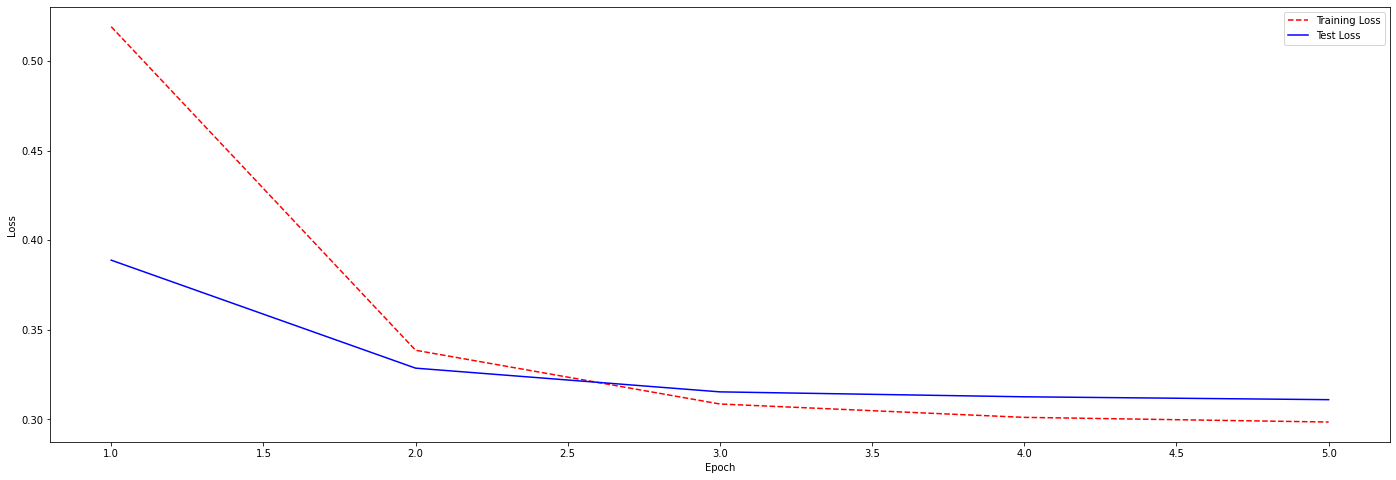

In [47]:
import matplotlib.pyplot as plt
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

We can find the Mean Squared Error (MSE) and other scores as follows.

In [48]:
from sklearn.metrics import accuracy_score, mean_squared_error

# print the training error and MSE
#print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % network.evaluate(PCA_X_train, y_train)[1])
print("Test set score: %f" % network.evaluate(PCA_X_test, y_test)[1])
#print(accuracy_score(y_test, predicted_target))

print("MSE: %f" % mean_squared_error(y_test, predicted_target))

1029/1029 [==============================] - 2s 2ms/step - loss: 0.2975 - accuracy: 0.8998
Training set score: 0.899787
258/258 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8925
Test set score: 0.892467
MSE: 0.086971


In [49]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

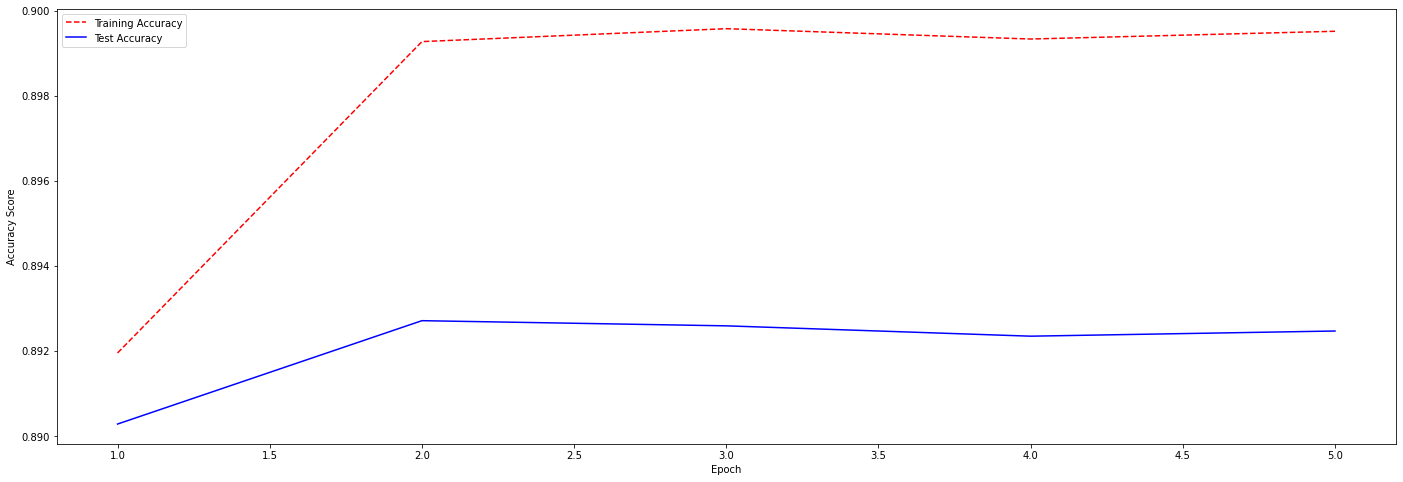

In [50]:
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

**Confusion Matrix**

Using confusion matrix, we can find how many true positives, false postives, false negatives and true negatives are there.

In [51]:
y_test.shape


(8230,)

In [52]:
predicted_target.shape

(8230, 1)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, predicted_target.round()))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7267
           1       0.66      0.17      0.27       963

    accuracy                           0.89      8230
   macro avg       0.78      0.58      0.60      8230
weighted avg       0.87      0.89      0.86      8230



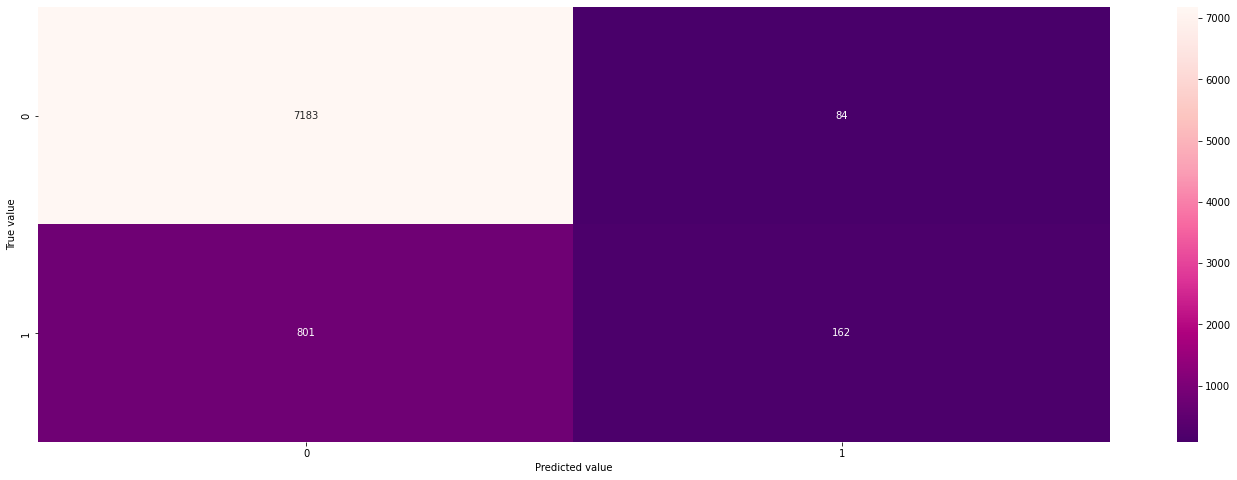

In [54]:
# Draw the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predicted_target.round())
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.RdPu_r, annot=True, fmt="d")
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

Visualizing Network Architecture

In [55]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

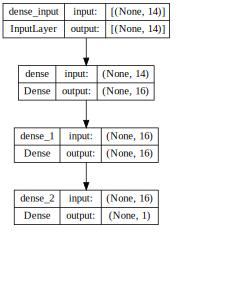

In [56]:
# Visualize network architecture
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))